In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
df= pd.read_csv("gdp-per-capita-ppp-constant-2011.csv")
df.head()

,Year,"GDP per capita, PPP (constant 2011 international $)"
0,1990,1754.857
1,1991,1737.615
2,1992,1796.532
3,1993,1845.149
4,1994,1930.113


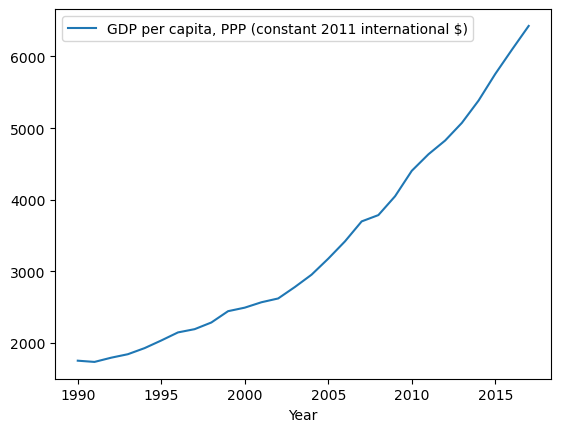

In [5]:
df.plot.line(x= 'Year',y='GDP per capita, PPP (constant 2011 international $)')
plt.show()

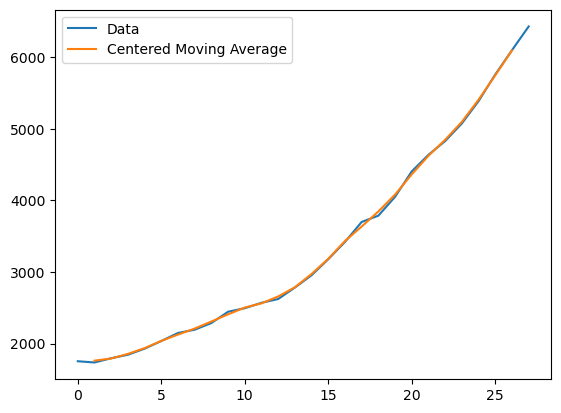

In [6]:
y= df['GDP per capita, PPP (constant 2011 international $)']
# Centered Moving Average
fcast = y.rolling(3,center=True).mean()
plt.plot(y,label = 'Data')
plt.plot(fcast,label = "Centered Moving Average")
plt.legend(loc = 'best')
plt.show()

In [7]:
y_train = df['GDP per capita, PPP (constant 2011 international $)'][:-5]
y_test  =df['GDP per capita, PPP (constant 2011 international $)'][-5:]

In [11]:
# Trailing Moving Average
fcast = y_train.rolling(3).mean()
MA=fcast.iloc[-1]
MA_series  =pd.Series(MA.repeat(len(y_test)))
MA_fcast  = pd.concat([fcast,MA_series],ignore_index=True)

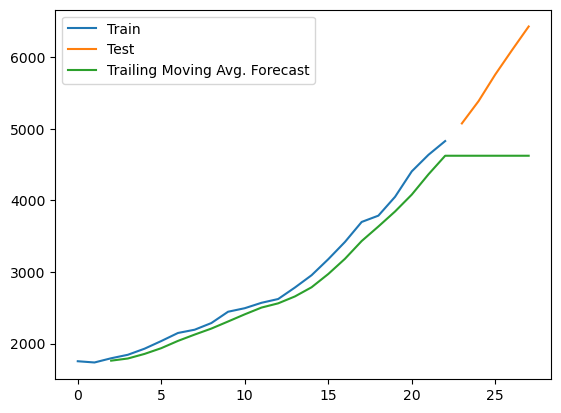

In [13]:
plt.plot(y_train,label ='Train')
plt.plot(y_test,label='Test')
plt.plot(MA_fcast,label = 'Trailing Moving Avg. Forecast')
plt.legend(loc = 'best')
plt.show()

In [14]:
trailing_ma_rms = np.sqrt(mean_squared_error(y_test,MA_series))
trailing_ma_rms

1224.2952023203386

## Simple Exponential Smoothing

In [15]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [16]:
alpha=0.1
ses=SimpleExpSmoothing(y_train)
fit1=ses.fit(smoothing_level=alpha)
fcast1=fit1.forecast(len(y_test))

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


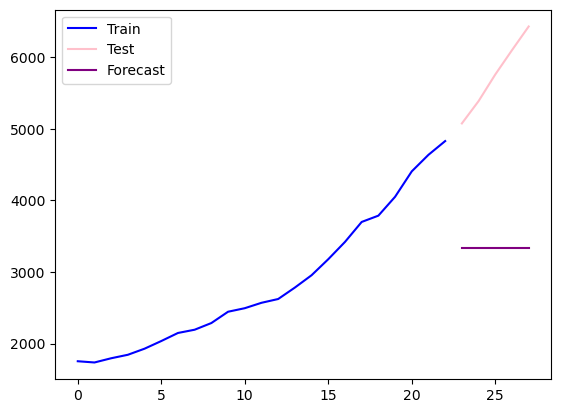

In [17]:
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.legend(loc='best')
plt.show()

In [18]:
simple_exp_smooth=np.sqrt(mean_squared_error(y_test,fcast1))
print("RMSE= ",np.sqrt(mean_squared_error(y_test,fcast1)))

RMSE=  2464.0994777314068


In [19]:
alpha=0.2
ses=SimpleExpSmoothing(y_train)
fit1=ses.fit(smoothing_level=alpha)
fcast1=fit1.forecast(len(y_test))

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


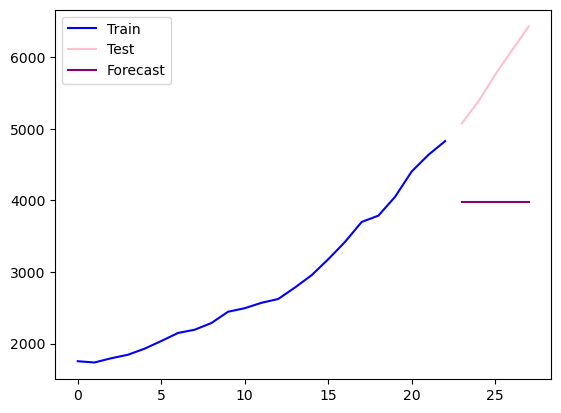

In [20]:
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.legend(loc='best')
plt.show()

In [21]:
print("RMSE= ",np.sqrt(mean_squared_error(y_test,fcast1)))

RMSE=  1836.3632322200644


## Holt's Linear Trend method

In [22]:
alpha=0.8
beta=0.02

In [23]:
from statsmodels.tsa.api import Holt
holt=Holt(y_train)
fit1=holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast=fit1.forecast(len(y_test))

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


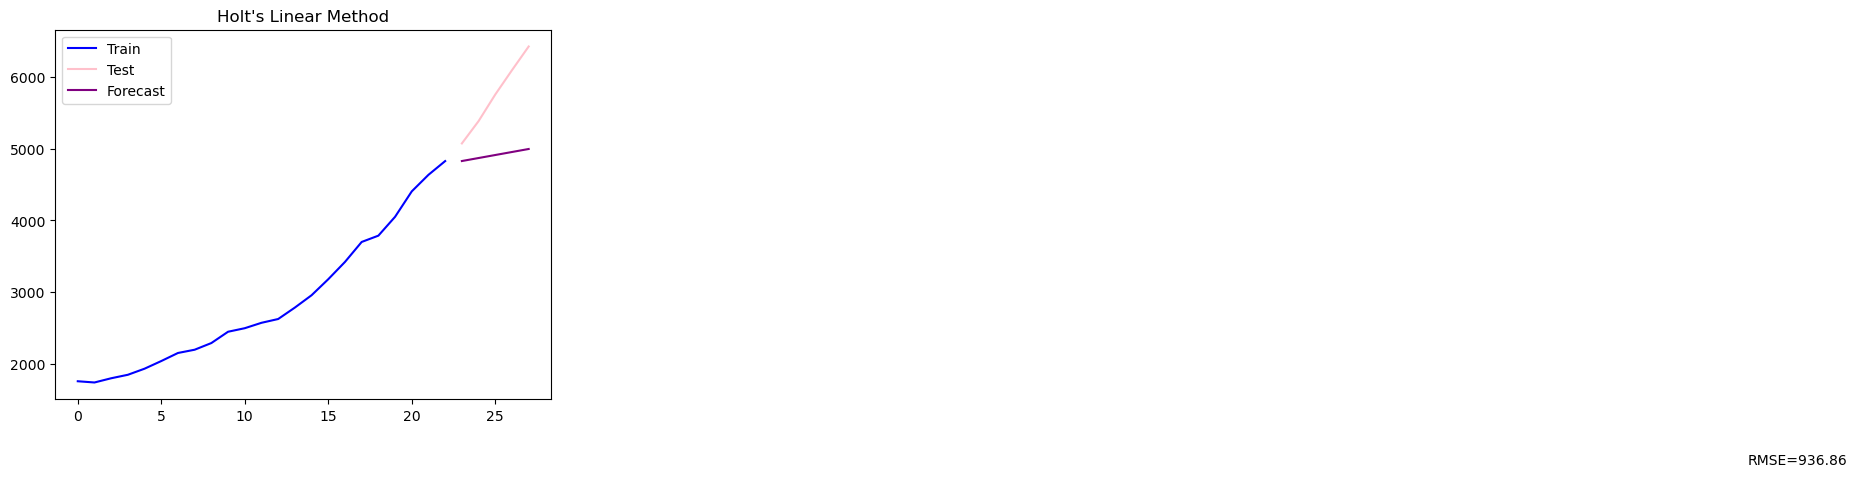

In [24]:
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast.plot(color='purple',label='Forecast')
error=np.round(np.sqrt(mean_squared_error(y_test,fcast)),2)
plt.text(100,600,'RMSE='+str(error))
plt.title("Holt's Linear Method")
plt.legend(loc='best')
plt.show()

In [25]:
holts_lin_trend=np.sqrt(mean_squared_error(y_test,fcast))
print("RMSE= ",np.sqrt(mean_squared_error(y_test,fcast)))

RMSE=  936.8580775126042


## Holt's Exp Trend method

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


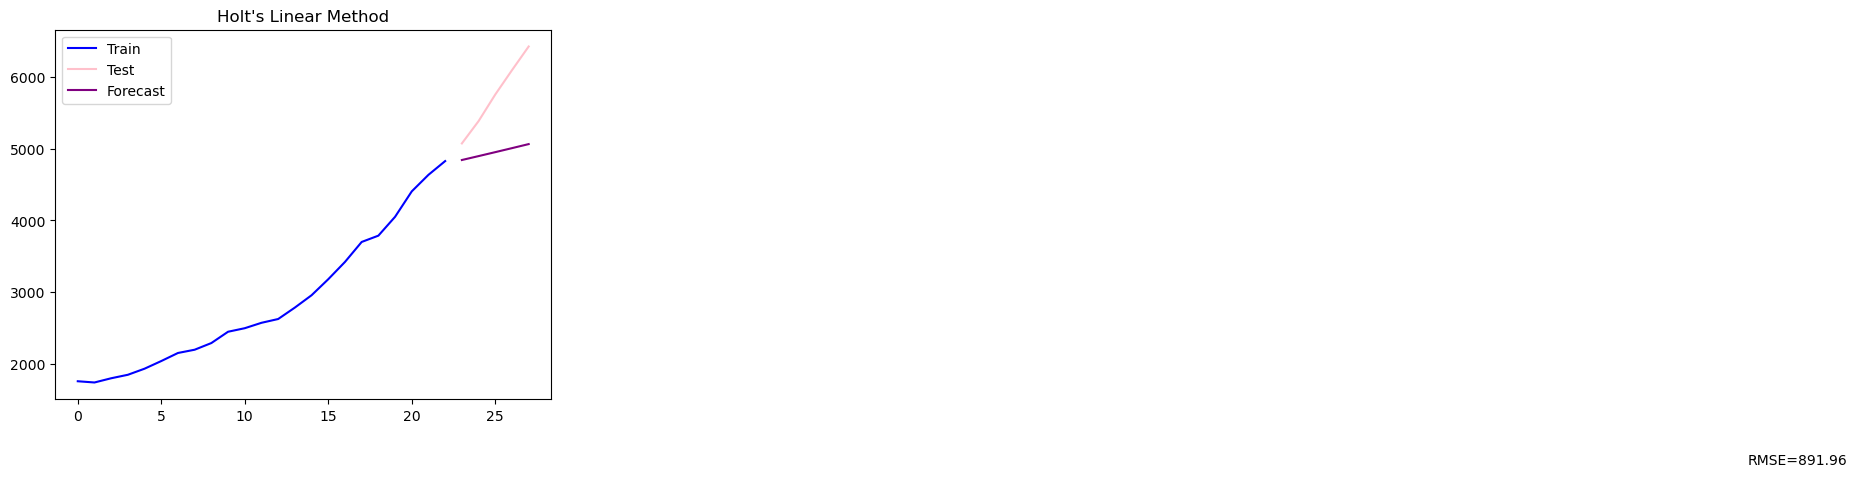

In [26]:
alpha=0.8
beta=0.02
from statsmodels.tsa.api import Holt
holt=Holt(y_train,exponential=True)
fit1=holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast=fit1.forecast(len(y_test))
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast.plot(color='purple',label='Forecast')
error=np.round(np.sqrt(mean_squared_error(y_test,fcast)),2)
plt.text(100,600,'RMSE='+str(error))
plt.title("Holt's Linear Method")
plt.legend(loc='best')
plt.show()

In [27]:
holts_exp_trend=np.sqrt(mean_squared_error(y_test,fcast))
print("RMSE= ",np.sqrt(mean_squared_error(y_test,fcast)))

RMSE=  891.9621691062789


## Additive Damped Trend

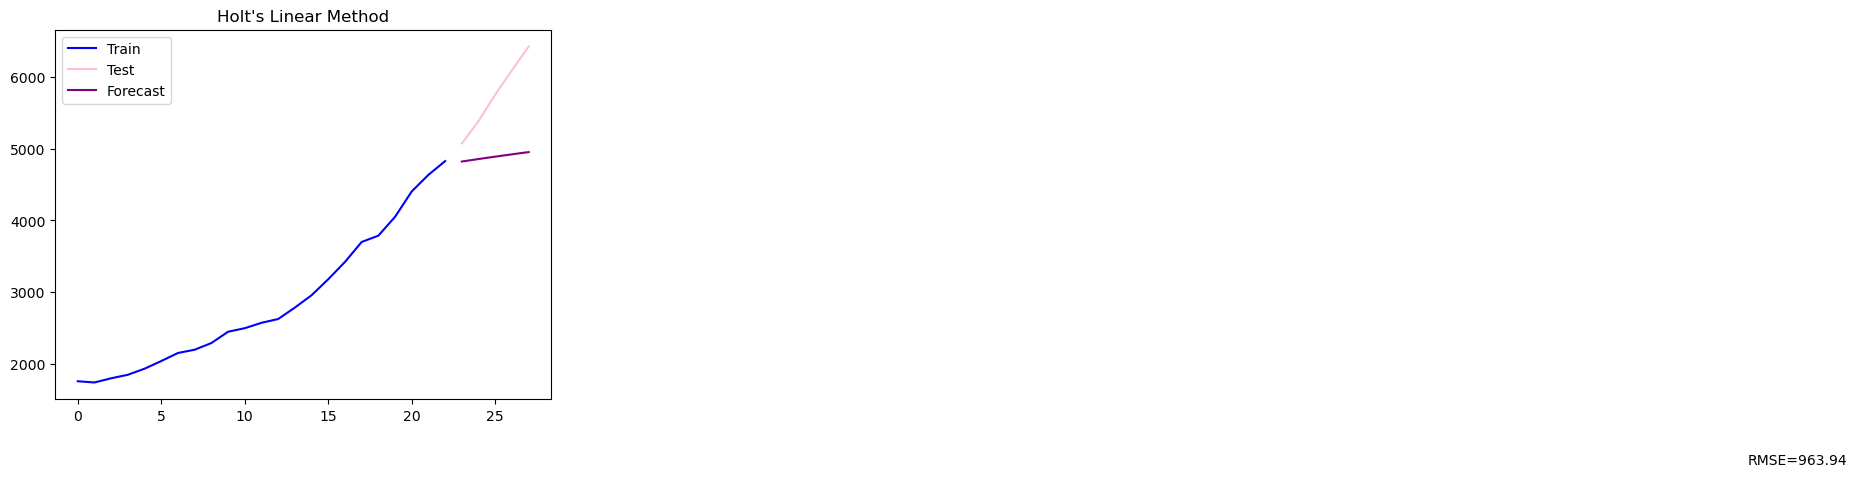

In [28]:
alpha=0.8
beta=0.02
from statsmodels.tsa.api import Holt
holt=Holt(y_train,damped_trend=True)
fit1=holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast=fit1.forecast(len(y_test))
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast.plot(color='purple',label='Forecast')
error=np.round(np.sqrt(mean_squared_error(y_test,fcast)),2)
plt.text(100,600,'RMSE='+str(error))
plt.title("Holt's Linear Method")
plt.legend(loc='best')
plt.show()

In [29]:
holts_lin_damped_trend=np.sqrt(mean_squared_error(y_test,fcast))
print("RMSE= ",np.sqrt(mean_squared_error(y_test,fcast)))

RMSE=  963.9359718031058


## Multiplicative Damped Trend

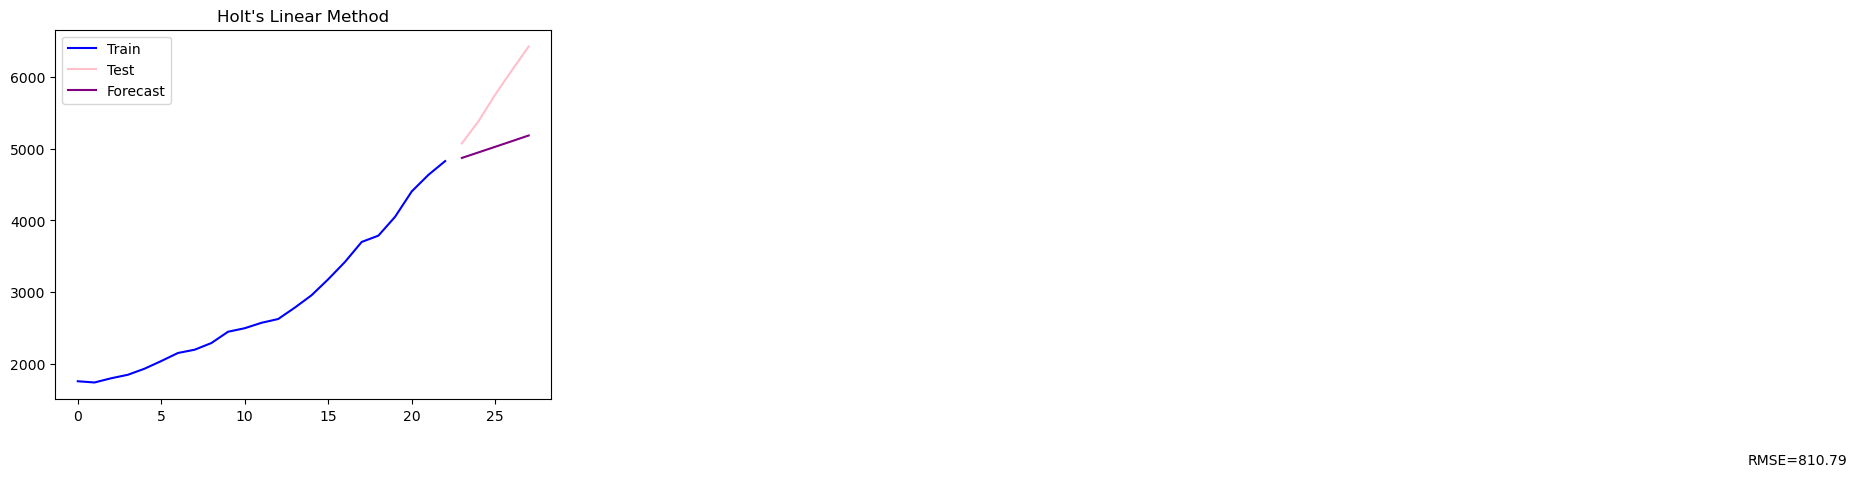

In [30]:
alpha=0.8
beta=0.02
from statsmodels.tsa.api import Holt
holt=Holt(y_train,exponential=True,damped_trend=True)
fit1=holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast=fit1.forecast(len(y_test))
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast.plot(color='purple',label='Forecast')
error=np.round(np.sqrt(mean_squared_error(y_test,fcast)),2)
plt.text(100,600,'RMSE='+str(error))
plt.title("Holt's Linear Method")
plt.legend(loc='best')
plt.show()

In [32]:
holts_exp_damped_damped_trend=np.sqrt(mean_squared_error(y_test,fcast))
print("RMSE= ",np.sqrt(mean_squared_error(y_test,fcast)))

RMSE=  810.7947435782106


## Holt-Winters Seasonal Method

### Additive

In [33]:
from statsmodels.tsa.api import ExponentialSmoothing

In [36]:
alpha=0.8
beta=0.02
gamma=0.1

In [37]:
hw_add=ExponentialSmoothing(y_train,seasonal_periods=2,trend='add',seasonal='add')
fit1=hw_add.fit(smoothing_level=alpha,
               smoothing_trend=beta,
               smoothing_seasonal=gamma)
fcast1=fit1.forecast(len(y_test))

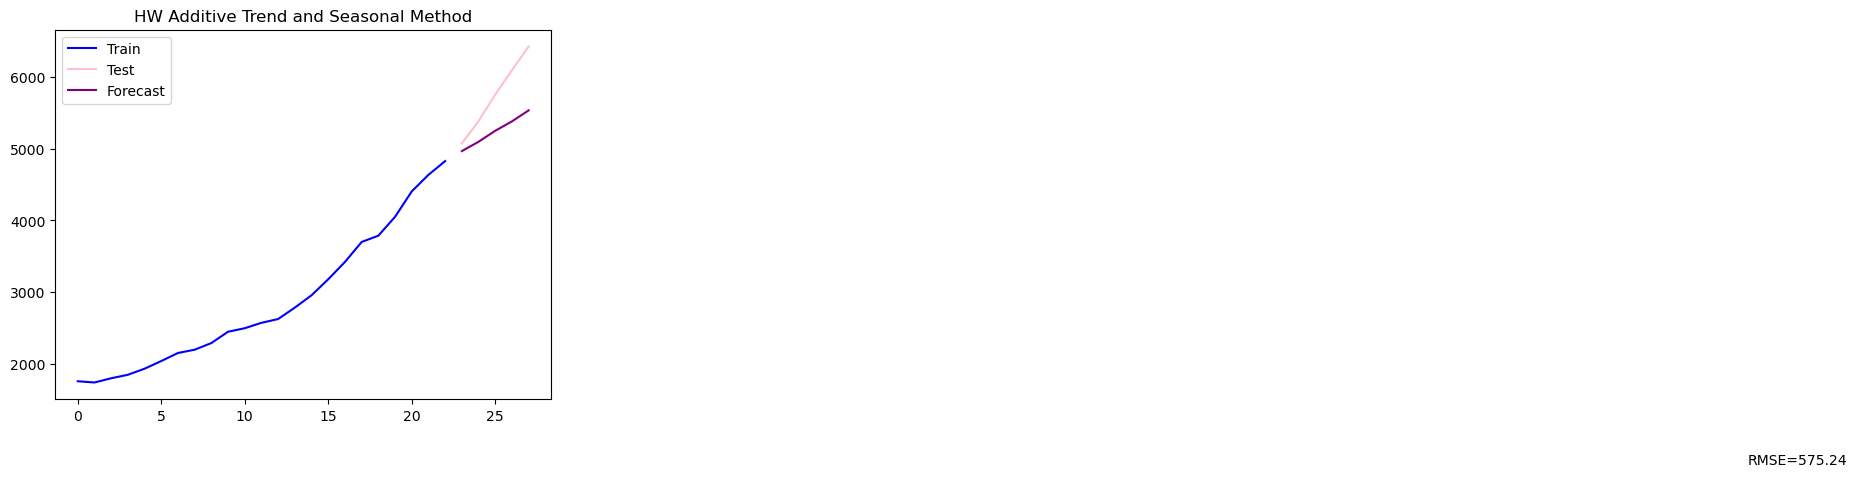

In [38]:
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error=np.round(np.sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,600,'RMSE='+str(error))
plt.title("HW Additive Trend and Seasonal Method")
plt.legend(loc='best')
plt.show()

In [39]:
hw_add=ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='add')
fit1=hw_add.fit()
fcast1=fit1.forecast(len(y_test))

ValueError: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.

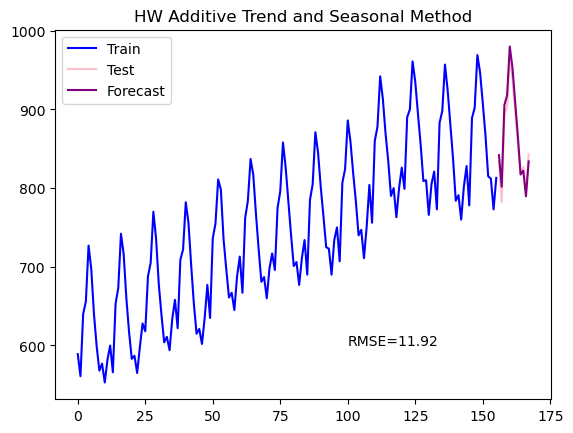

In [47]:
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error=np.round(np.sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,600,'RMSE='+str(error))
plt.title("HW Additive Trend and Seasonal Method")
plt.legend(loc='best')
plt.show()

### Multiplicative

In [49]:
hw_add=ExponentialSmoothing(y_train,seasonal_periods=12,trend='add',seasonal='mul')
fit1=hw_add.fit(smoothing_level=alpha,
               smoothing_trend=beta,
               smoothing_seasonal=gamma)
fcast1=fit1.forecast(len(y_test))

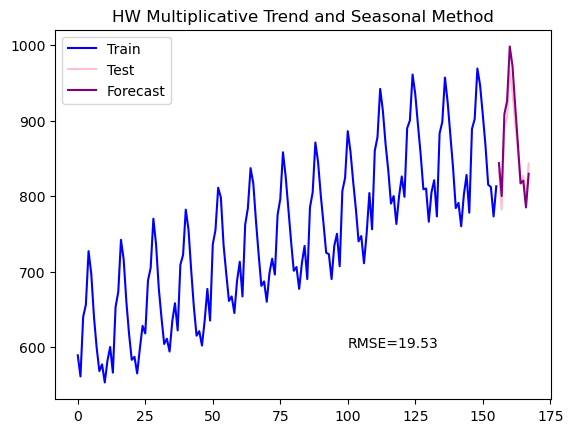

In [51]:
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error=np.round(np.sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,600,'RMSE='+str(error))
plt.title("HW Multiplicative Trend and Seasonal Method")
plt.legend(loc='best')
plt.show()